In [1]:
'''
Step 01 :- Preprocessing and cleaning the dataset
'''

'\nStep 01 :- Preprocessing and cleaning the dataset\n'

In [2]:
import pandas as pd
import numpy as np


C:\Users\agnes\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Loading the Dataset
df = pd.read_csv("Path of dataset")

In [4]:
# Getting the information about the dataset
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  str    
 1   date                  122400 non-null  str    
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  str    
 9   device                122400 non-null  str    
 10  country               122400 non-null  str    
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), str(5)
memory usage: 16.9 MB


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [5]:
# Checking Null Values in the data
df.isnull()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,False,False,False,False,False,False,False,False,False,False,False,False
122396,False,False,False,False,False,False,False,False,False,False,False,False
122397,False,False,False,False,True,False,False,False,False,False,False,False
122398,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().any()

np.True_

In [7]:
# np.True_ , means there are NULL values in the dataset

In [8]:
# Handling NULL values
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','string']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
df.duplicated().sum().any()

np.True_

In [10]:
# np.True_, means there are duplicate values in the dataset

In [11]:
# Dropping Duplicates values from the dataset
df = df.drop_duplicates()
print("Duplicate Data's are successfully dropped!")

Duplicate Data's are successfully dropped!


In [12]:
# Data Feature Handling
if 'date' in df.columns:
    df['date']=pd.to_datetime(df['date'])

    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    df.drop(columns=['date'], inplace=True)

In [13]:
# To check whether 'date' column is dropped or not?
df.columns

Index(['video_id', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd', 'day', 'month', 'year'],
      dtype='str')

In [14]:
# Categorical Encoding for the columns -> Category, device, country(Using One-Hot Encoding)
# “One-hot encoding avoids ordinal bias in categorical variables.”
df = pd.get_dummies(df, columns=['category','device','country'], drop_first=True)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['views','likes','comments','watch_time_minutes','video_length_minutes','subscribers']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [16]:
# Final Check

In [17]:
# Count NULLs per column
df.isnull().sum().sort_values(ascending=False)

video_id                  0
views                     0
likes                     0
comments                  0
watch_time_minutes        0
video_length_minutes      0
subscribers               0
ad_revenue_usd            0
day                       0
month                     0
year                      0
category_Entertainment    0
category_Gaming           0
category_Lifestyle        0
category_Music            0
category_Tech             0
device_Mobile             0
device_TV                 0
device_Tablet             0
country_CA                0
country_DE                0
country_IN                0
country_UK                0
country_US                0
dtype: int64

In [18]:
df.info()
df.isnull().sum()


<class 'pandas.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                120000 non-null  str    
 1   views                   120000 non-null  float64
 2   likes                   120000 non-null  float64
 3   comments                120000 non-null  float64
 4   watch_time_minutes      120000 non-null  float64
 5   video_length_minutes    120000 non-null  float64
 6   subscribers             120000 non-null  float64
 7   ad_revenue_usd          120000 non-null  float64
 8   day                     120000 non-null  int32  
 9   month                   120000 non-null  int32  
 10  year                    120000 non-null  int32  
 11  category_Entertainment  120000 non-null  bool   
 12  category_Gaming         120000 non-null  bool   
 13  category_Lifestyle      120000 non-null  bool   
 14  category_Music          120000 non-n

video_id                  0
views                     0
likes                     0
comments                  0
watch_time_minutes        0
video_length_minutes      0
subscribers               0
ad_revenue_usd            0
day                       0
month                     0
year                      0
category_Entertainment    0
category_Gaming           0
category_Lifestyle        0
category_Music            0
category_Tech             0
device_Mobile             0
device_TV                 0
device_Tablet             0
country_CA                0
country_DE                0
country_IN                0
country_UK                0
country_US                0
dtype: int64

In [19]:
print("Nulls:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
print("Whitespace issues:",
      any(not df[col].str.strip().eq(df[col]).all()
          for col in df.select_dtypes(include="object")))


Nulls: 0
Duplicates: 0
Whitespace issues: False


C:\Users\agnes\AppData\Local\Temp\ipykernel_21124\2983180176.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include="object")))


In [20]:
--------------------------------------------------------------------------------------

SyntaxError: invalid syntax (1687770673.py, line 1)

In [ ]:
'''
Step 02 :- Feature Engineering
'''

In [21]:
# 1. Engagement Rate (High engagement → better ad placement → more revenue)
df['Engagement_rate'] = (df['likes'] + df['comments']) / (df['views'] + 1)

In [22]:
# 2. Likes per View Ratio (“Higher likes per view indicate positive audience reception.”)
df['like_view_ratio'] = df['likes']/(df['views']+1)

In [23]:
# 3. Comments per View Ratio(“Comments reflect deeper engagement compared to passive likes.”)
df['Comment_view_ratio'] = df['comments']/(df['views']+1)

In [24]:
# 4.Watch Time Per View(“Longer watch time increases mid-roll ad opportunities, boosting revenue.”)
df['Avg_watch_time_per_view'] = df['watch_time_minutes']/(df['views']+1)

In [25]:
# 5.Video Completion Proxy (“This approximates video completion rate, which strongly impacts ad delivery.”)
df['watch_time_ratio'] = df['Avg_watch_time_per_view']/(df['video_length_minutes']+0.01)

In [28]:
# 6. Subscriber Influence Factor(“Higher values indicate organic reach and better monetization potential".)
df['views_per_subscriber'] = df['views']/(df['subscribers']+1)

In [27]:
# 7. Engagement Weighted Watch Time(Combines attention + interaction)
df['engagement_weighted_watchtime'] = df['watch_time_minutes'] * df['Engagement_rate']


In [ ]:
-------------------------------------------------------------------------------------------

In [ ]:
'''
Step 03 :- EDA Visuals
'''

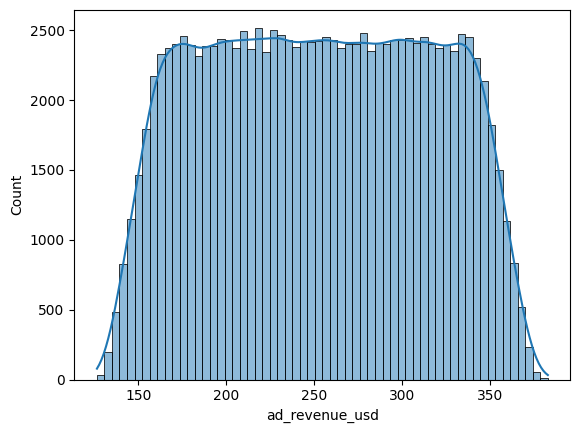

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ad_revenue_usd'], kde=True)
plt.show()


In [ ]:
'''
Step 04 :- Model Building (5 Models Required)
'''

In [48]:
from sklearn.model_selection import train_test_split

x = df.drop('ad_revenue_usd', axis = 1)
y = df['ad_revenue_usd']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [59]:
print(x.shape)
print(x.columns)


(120000, 29)
Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'day', 'month', 'year',
       'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
       'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
       'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK',
       'country_US', 'Engagement_rate', 'like_view_ratio',
       'Comment_view_ratio', 'Avg_watch_time_per_view', 'watch_time_ratio',
       'views_per_subscriber', 'engagement_weighted_watchtime'],
      dtype='str')


In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [ ]:
-------------------------------------------------------------------------------------------

In [ ]:
'''
Step 05 :- Model Evaluation 
'''

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [51]:
df = df.drop(columns=['video_id'])


KeyError: "['video_id'] not found in axis"

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)


In [53]:
x_train.dtypes

views                            float64
likes                            float64
comments                         float64
watch_time_minutes               float64
video_length_minutes             float64
subscribers                      float64
day                                int32
month                              int32
year                               int32
category_Entertainment              bool
category_Gaming                     bool
category_Lifestyle                  bool
category_Music                      bool
category_Tech                       bool
device_Mobile                       bool
device_TV                           bool
device_Tablet                       bool
country_CA                          bool
country_DE                          bool
country_IN                          bool
country_UK                          bool
country_US                          bool
Engagement_rate                  float64
like_view_ratio                  float64
Comment_view_rat

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression")
print("R2:", r2_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    })


In [56]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)


,Model,R2,RMSE,MAE
2,Lasso Regression,0.952584,13.478691,3.088352
0,Linear Regression,0.952575,13.479960,3.114465
1,Ridge Regression,0.952575,13.479961,3.114483
4,Gradient Boosting,0.952261,13.524467,3.678243
3,Random Forest,0.949295,13.938273,3.616665


In [ ]:
'''
From the above table , it shows that 'Lasso Regression' model is best, because it has HIGH R2 Value, LOW RMSE Value, LOW MAE Value.
'''

In [ ]:
-------------------------------------------------------------------------------------------

In [ ]:
'''
Detecting Outliers
'''

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


In [ ]:
import numpy as np

def outlier_summary(df, cols):
    outlier_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_info[col] = outliers
    return outlier_info

outlier_summary(df, num_cols)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['views', 'likes', 'comments', 'watch_time_minutes', 'subscribers']:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection for {col}')
    plt.show()


In [ ]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                            np.where(df[col] > upper, upper, df[col]))
    return df


In [ ]:
outlier_cols = [
    'views', 'likes', 'comments',
    'watch_time_minutes', 'subscribers'
]

df = cap_outliers(df, outlier_cols)


In [ ]:
outlier_summary(df, outlier_cols)


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)


In [ ]:
# SAVE the final model
import pickle

with open("lasso_model.pkl", "wb") as f:
    pickle.dump(lasso_model, f)


In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
with open("lasso_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

st.set_page_config(page_title="YouTube Ad Revenue Predictor", layout="centered")

st.title("📊 YouTube Ad Revenue Prediction")
st.write("Predict ad revenue based on video performance and engagement metrics.")

st.sidebar.header("📌 Input Video Metrics")

# User Inputs
views = st.sidebar.number_input("Views", min_value=0, value=10000)
likes = st.sidebar.number_input("Likes", min_value=0, value=500)
comments = st.sidebar.number_input("Comments", min_value=0, value=50)
watch_time = st.sidebar.number_input("Watch Time (minutes)", min_value=0.0, value=2000.0)
video_length = st.sidebar.number_input("Video Length (minutes)", min_value=0.1, value=10.0)
subscribers = st.sidebar.number_input("Subscribers", min_value=0, value=10000)

# Feature Engineering (MUST match training)
engagement_rate = (likes + comments) / (views + 1)
like_view_ratio = likes / (views + 1)
comment_view_ratio = comments / (views + 1)
avg_watch_time_per_view = watch_time / (views + 1)
watch_time_ratio = avg_watch_time_per_view / (video_length + 0.01)
views_per_subscriber = views / (subscribers + 1)

# Create feature array (ORDER MATTERS)
features = np.array([[
    views,
    likes,
    comments,
    watch_time,
    video_length,
    subscribers,
    engagement_rate,
    like_view_ratio,
    comment_view_ratio,
    avg_watch_time_per_view,
    watch_time_ratio,
    views_per_subscriber
]])

# Scale numerical features
features_scaled = scaler.transform(features)

# Predict
if st.button("💰 Predict Ad Revenue"):
    prediction = model.predict(features_scaled)[0]
    st.success(f"Estimated Ad Revenue: ${prediction:.2f}")


In [67]:
x = df.drop('ad_revenue_usd', axis=1)
print(x.shape)        # MUST print (something, 29)
print(x.columns)      # MUST list 29 columns


(120000, 29)
Index(['views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'day', 'month', 'year',
       'category_Entertainment', 'category_Gaming', 'category_Lifestyle',
       'category_Music', 'category_Tech', 'device_Mobile', 'device_TV',
       'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK',
       'country_US', 'Engagement_rate', 'like_view_ratio',
       'Comment_view_ratio', 'Avg_watch_time_per_view', 'watch_time_ratio',
       'views_per_subscriber', 'engagement_weighted_watchtime'],
      dtype='str')


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)   # <-- FIT on 29
x_test_scaled = scaler.transform(x_test)


In [75]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [76]:
import pickle

with open("lasso_model.pkl", "wb") as f:
    pickle.dump(lasso_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [73]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=0.01))
])


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

X = df.drop("ad_revenue_usd", axis=1)
y = df["ad_revenue_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.001, max_iter=10000))
])

pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('lasso', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.001
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True


In [78]:
import pickle

with open("lasso_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import pickle


In [80]:
X = df.drop("ad_revenue_usd", axis=1)
y = df["ad_revenue_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [81]:
lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.001, max_iter=10000))
])

lasso_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('lasso', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.001
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True


In [82]:
with open("lasso_pipeline.pkl", "wb") as f:
    pickle.dump(lasso_pipeline, f)
